<a href="https://colab.research.google.com/github/corinnakeum1/labs/blob/main/WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://washingtondc.craigslist.org/search/mca#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page

In [16]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [17]:
# @title Default title text
import re # Regular expressions

brands = ['harley','ducati', 'suzuki', 'honda', 'yamaha', 'kawasaki', 'ducati', 'vespa',
          'triumph', 'zero', 'buell', 'aprilia', 'arch', 'ktm', 'bmw', 'lightning',
          'bajaj', 'royal enfield', 'absolom']

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        continue

    brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})



In [18]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_cars.csv') # Save data in case of a disaster
df.head()

(128, 6)


,title,price,year,link,brand,age
0,2006 honda shadow aero,3250,2006.0,https://washingtondc.craigslist.org/mld/mcy/d/...,honda,19.0
1,kawasaki kx 450,3800,NaN,https://washingtondc.craigslist.org/doc/mcy/d/...,kawasaki,NaN
2,suzuki sv650 - naked,3500,NaN,https://washingtondc.craigslist.org/nva/mcd/d/...,suzuki,NaN
3,ktm duke,5000,NaN,https://washingtondc.craigslist.org/nva/mcd/d/...,ktm,NaN
4,yamaha xvs1300 vstar,4000,NaN,https://washingtondc.craigslist.org/nva/mcd/d/...,yamaha,NaN


count      128.000000
mean      6586.242188
std       4529.143189
min          0.000000
25%       3500.000000
50%       5200.000000
75%       9050.000000
max      21500.000000
Name: price, dtype: float64


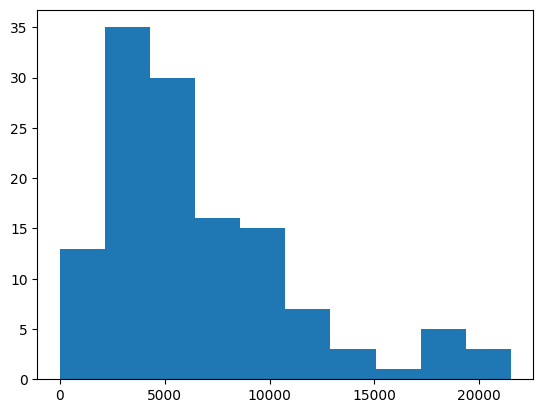

count    86.000000
mean     13.174419
std      10.268389
min       1.000000
25%       6.000000
50%      11.000000
75%      19.000000
max      64.000000
Name: age, dtype: float64


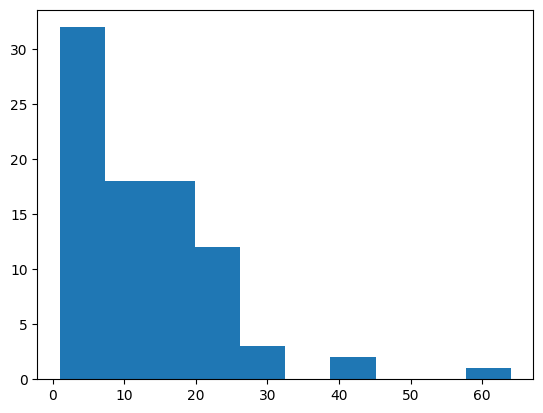

In [19]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [20]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                               \
         count         mean          std     min      25%     50%       75%   
brand                                                                         
aprilia    2.0  9700.000000   424.264069  9400.0  9550.00  9700.0   9850.00   
bmw       15.0  9030.000000  6189.299522  2250.0  4000.00  6500.0  12500.00   
ducati     5.0  7879.800000  3600.831876  3800.0  4200.00  9899.0  10000.00   
harley    35.0  9567.485714  5032.136147  2700.0  5547.50  6900.0  12650.00   
honda     15.0  3502.666667  2237.784193   750.0  1850.00  3200.0   4375.00   
kawasaki  15.0  4093.333333  1556.193463  1100.0  3550.00  3900.0   4650.00   
ktm        4.0  7124.750000  1629.391579  5000.0  6275.00  7500.0   8349.75   
suzuki    10.0  4785.000000  2109.245521  2500.0  3050.00  4450.0   6025.00   
triumph    7.0  6628.571429  2770.357550  2000.0  5150.00  6950.0   8625.00   
vespa      6.0  3332.500000  2658.634518     0.0  1748.75  2747.5   5625.00   
yamaha    14.0  4088.857143  2381.666962  1300.0  1862.25  4000.0   5000.00   

                   
              max  
brand              
aprilia   10000.0  
bmw       19900.0  
ducati    11500.0  
harley    21500.0  
honda      9500.0  
kawasaki   8250.0  
ktm        8499.0  
suzuki     9300.0  
triumph    9900.0  
vespa      6500.0  
yamaha     9200.0

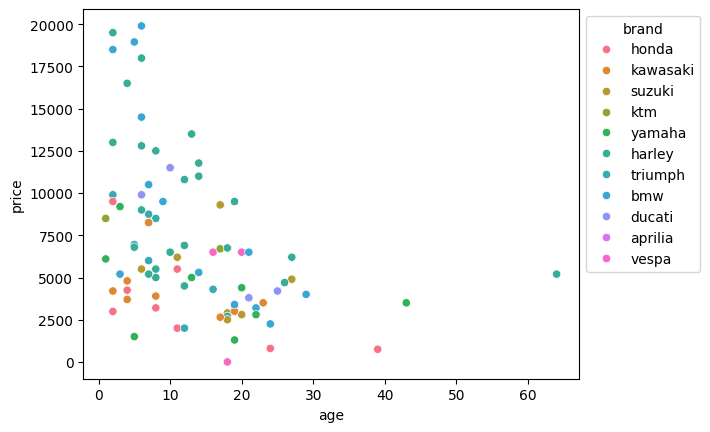

In [21]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           log_price   log_age
log_price   0.473171 -0.267847
log_age    -0.267847  0.749352
           log_price   log_age
log_price   1.000000 -0.450858
log_age    -0.450858  1.000000


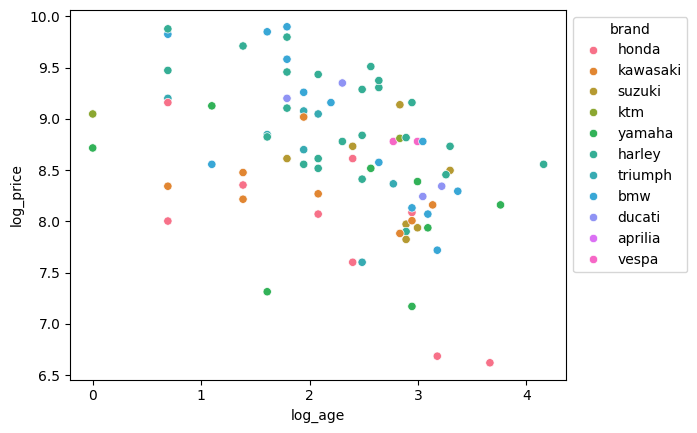

In [22]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

In [24]:
# sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')